In [1]:
import os
os.chdir('../')
print(os.getcwd())

/cis/home/tding/mcr2/mcr2_cluster


In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt



from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import _supervised
from scipy.optimize import linear_sum_assignment
import numpy as np
import torchvision as tv
import torch
from metrics_cluster import spectral_clustering_metrics

In [6]:
def plot_heatmap(Z):
    features = Z
    sim_mat = np.abs(features @ features.T)

    fig, ax = plt.subplots(figsize=(7, 5), sharey=True, sharex=True,dpi=800)
    im = ax.imshow(sim_mat, cmap='Blues')
    fig.colorbar(im, pad=0.02, drawedges=0)

def plot_membership(pi, title='', cmax=0.2):
    fig, ax = plt.subplots(figsize=(5, 5),dpi=800)
    im = ax.imshow(pi, cmap='Blues')
    ax.set_title(title)
    fig.colorbar(im, pad=0.02, drawedges=0)
    im.set_clim(0,cmax)
    
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [13]:
exp_dir = './saved_models/unsup/mnist_2class+simple/samples200epochs800_eps0.1_netlr0.1_netsteps1_pisteps1_piinituniform_pigam0.1_pitau0.1_pisymTruecheckMetrics/'
Pi_path = os.path.join(exp_dir, 'membership/epoch790.npy')

X_train_path =  os.path.join(exp_dir, 'features/X_train.npy')
y_train_path =  os.path.join(exp_dir, 'features/y_train.npy')
Z_train_path =  os.path.join(exp_dir, 'features/Z_train.npy')


Pi = np.load(Pi_path)
X_train = np.load(X_train_path)
y_train = np.load(y_train_path)
Z_train = np.load(Z_train_path)

In [ ]:
Z_train.shape

In [ ]:
y_train

In [15]:
acc_lst, nmi_lst, fd_error, nnz, pred_lst = spectral_clustering_metrics(Pi, 2, y_train)

Acc mean: 0.990   ||| stdev: 0.0000


In [ ]:
acc_lst

In [ ]:
pred_lst[-1]

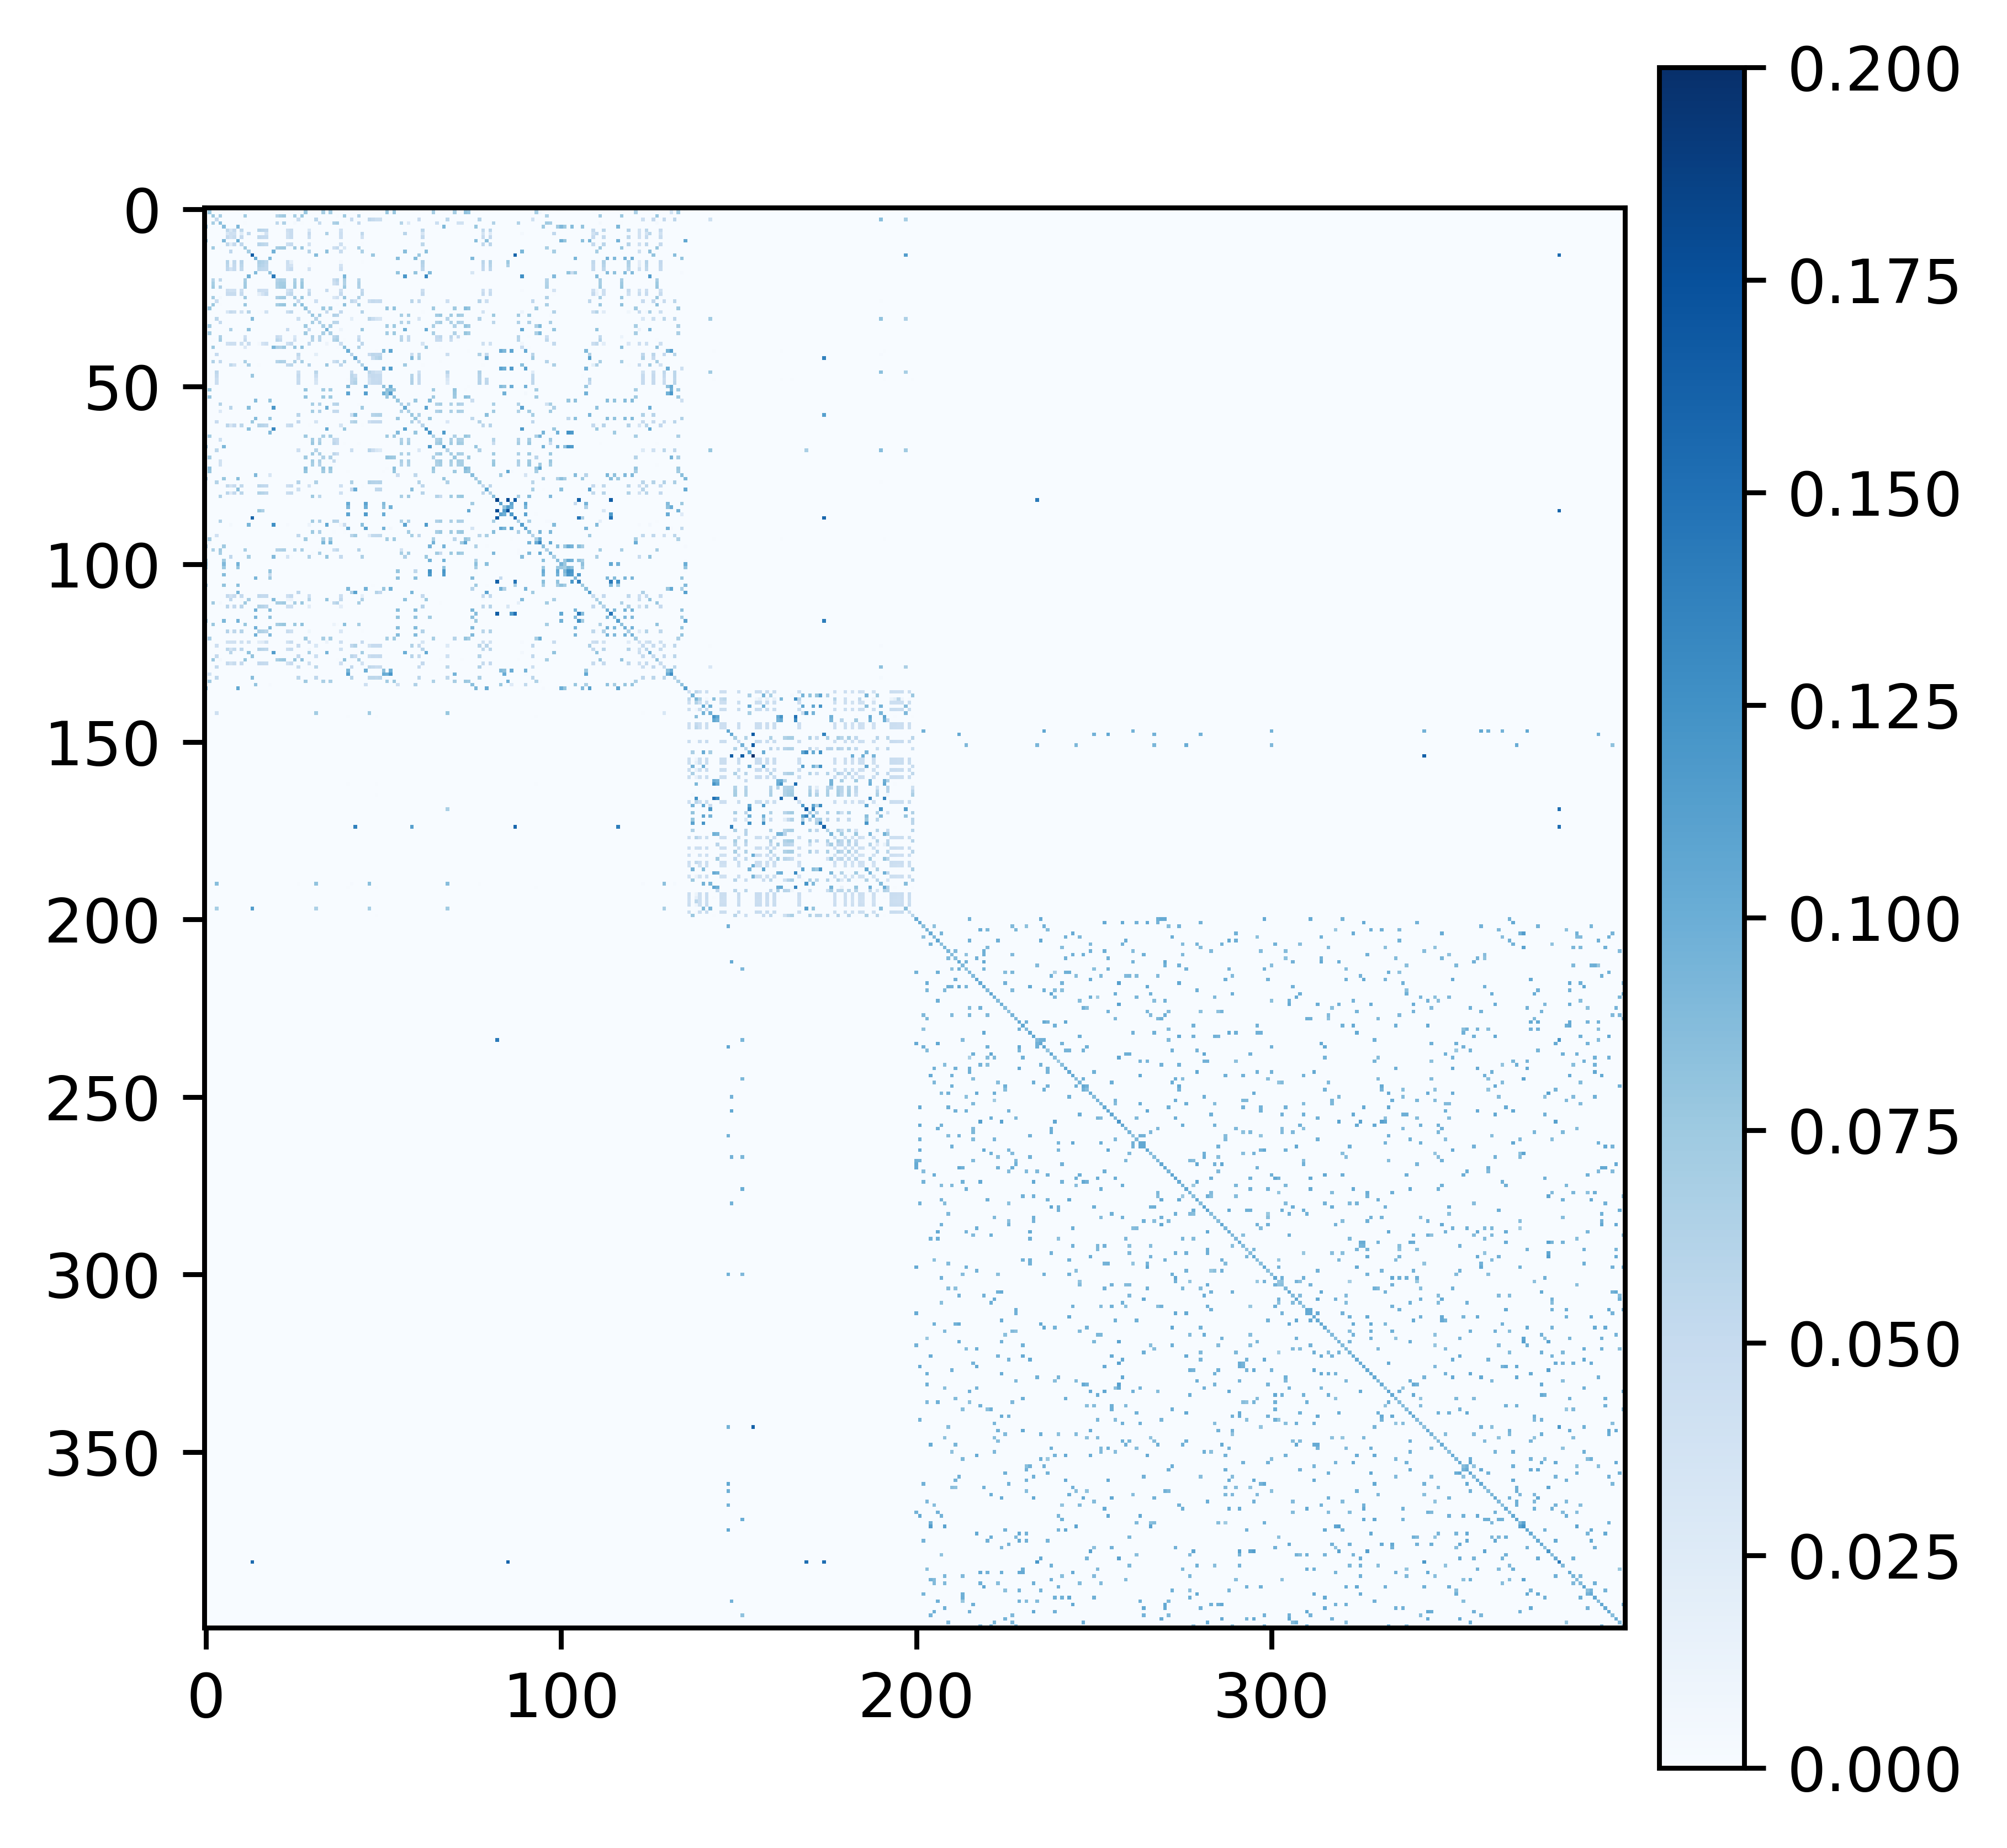

In [7]:
pred_order = np.argsort(pred_lst[-1])
pred_order_save = pred_order
Pi_sorted = Pi[np.ix_(pred_order, pred_order)]
plot_membership(Pi_sorted)

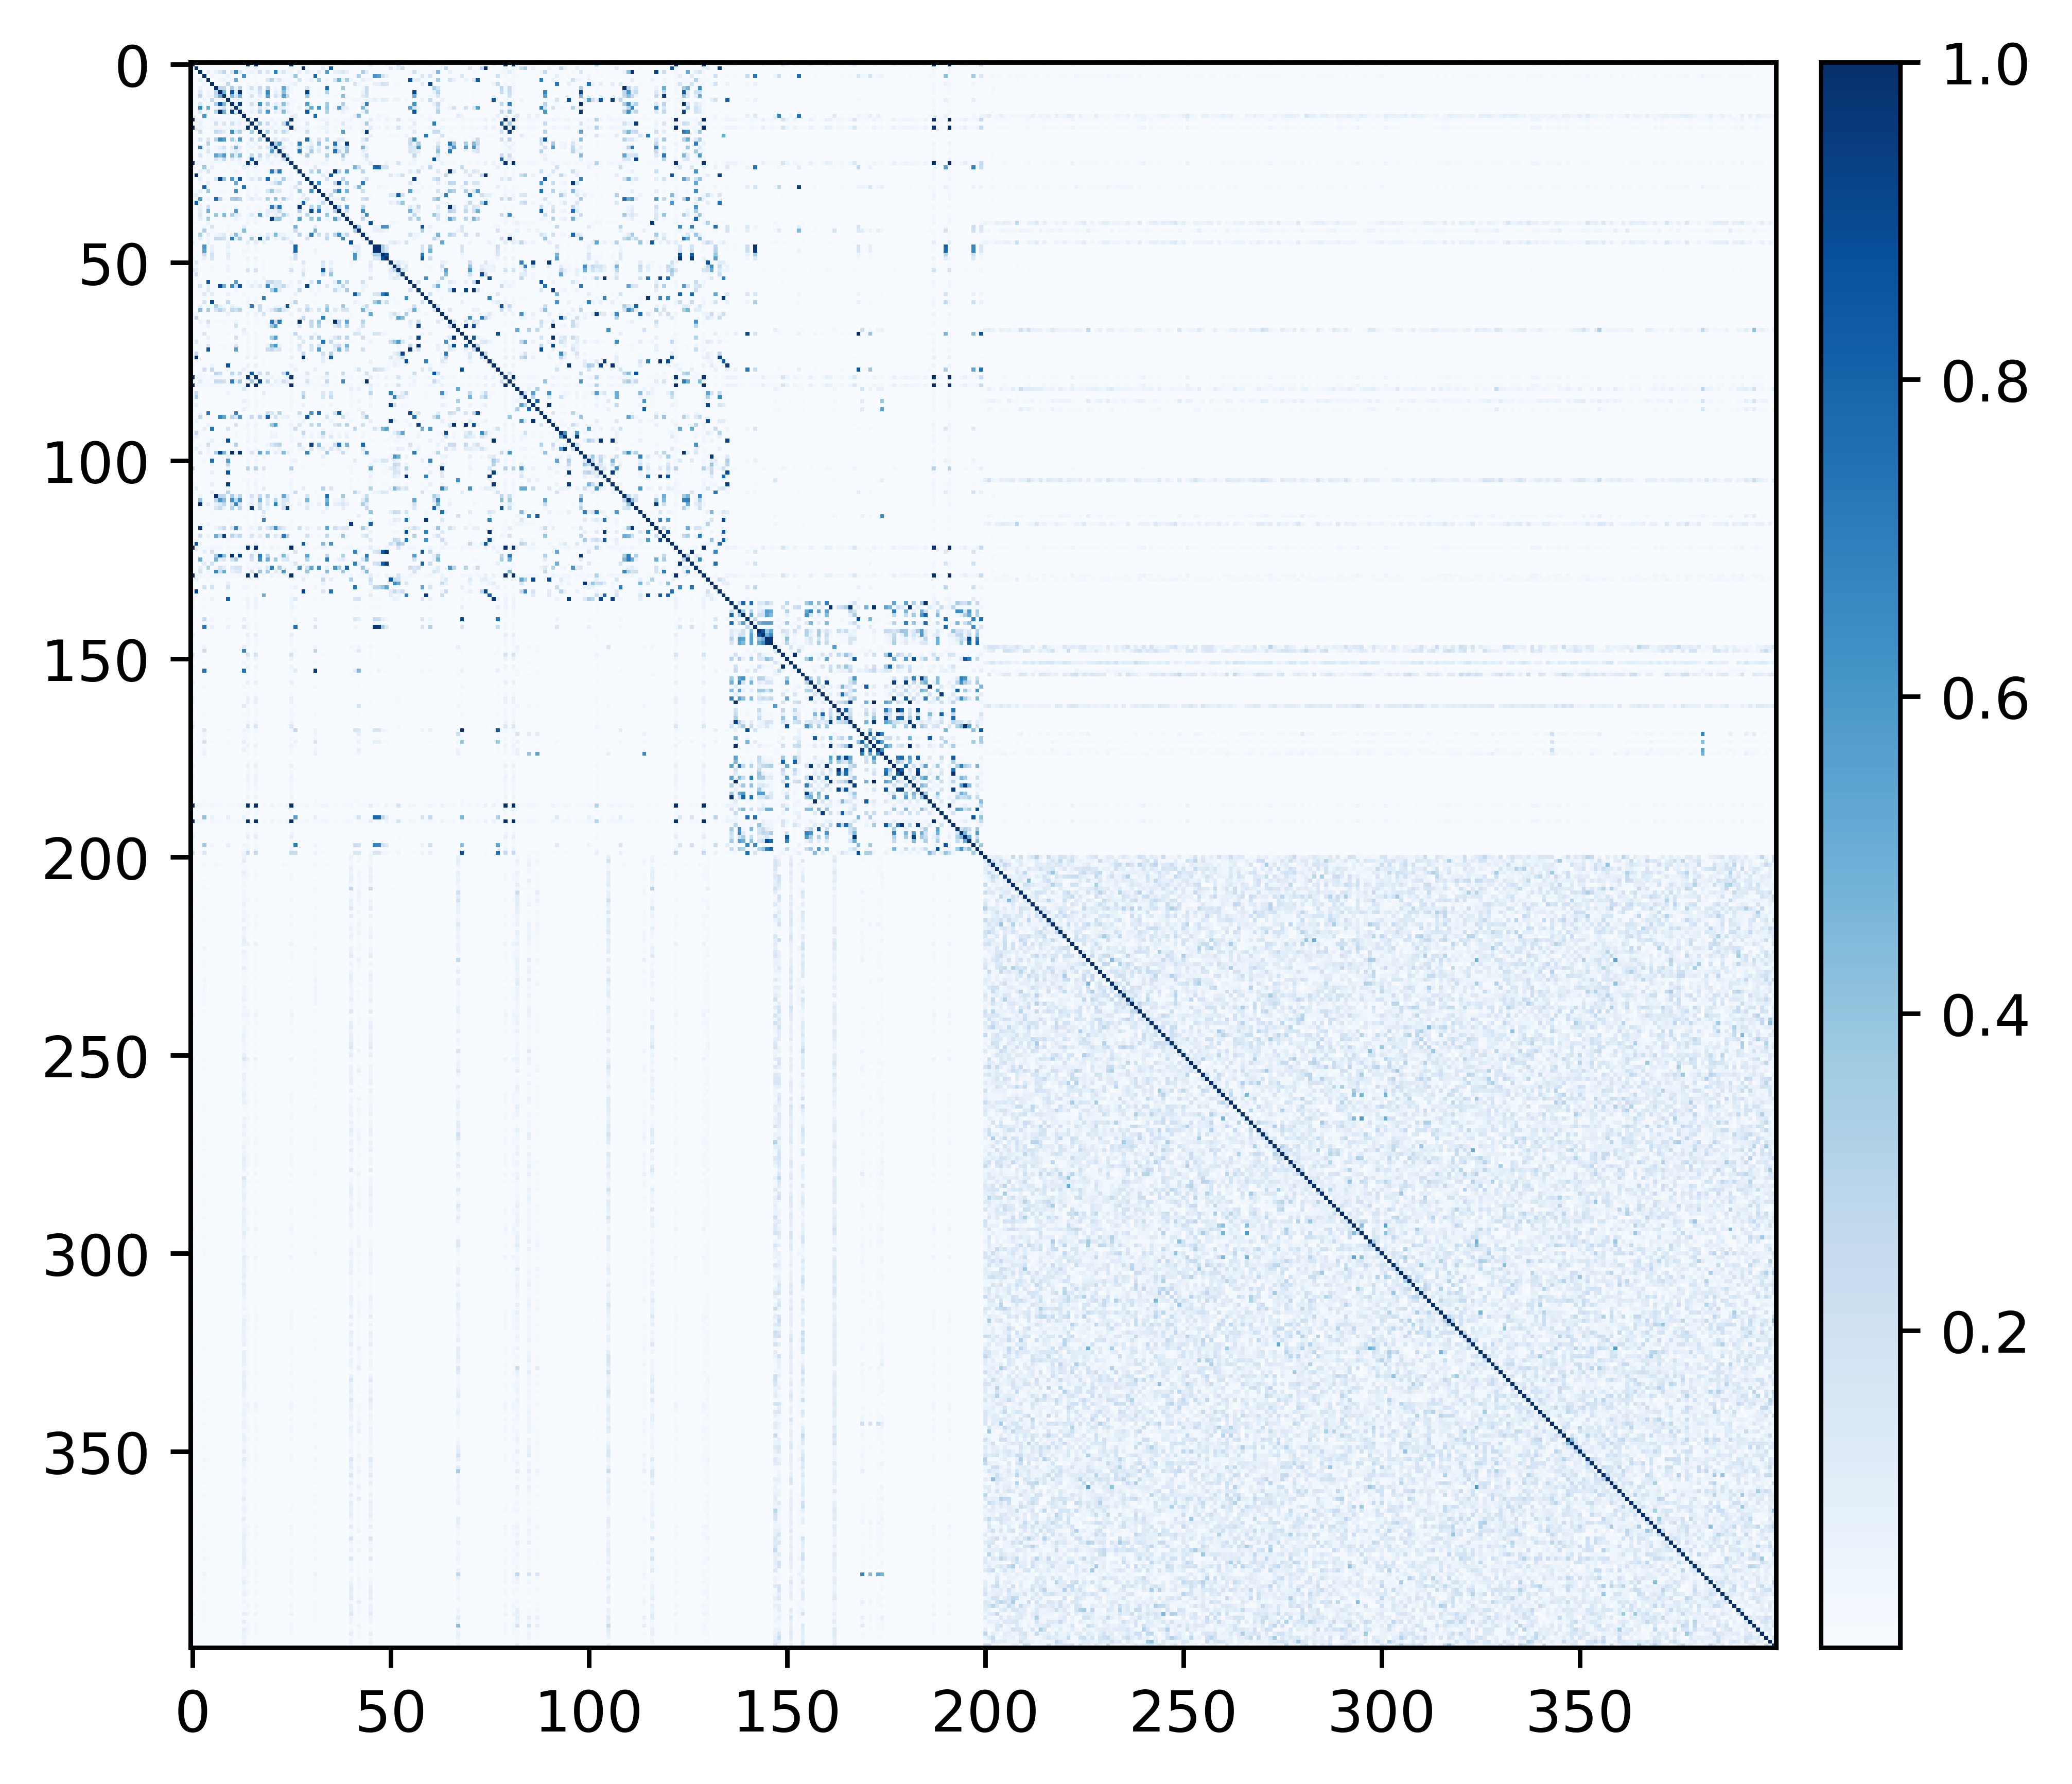

In [8]:
plot_heatmap(Z_train[pred_order])

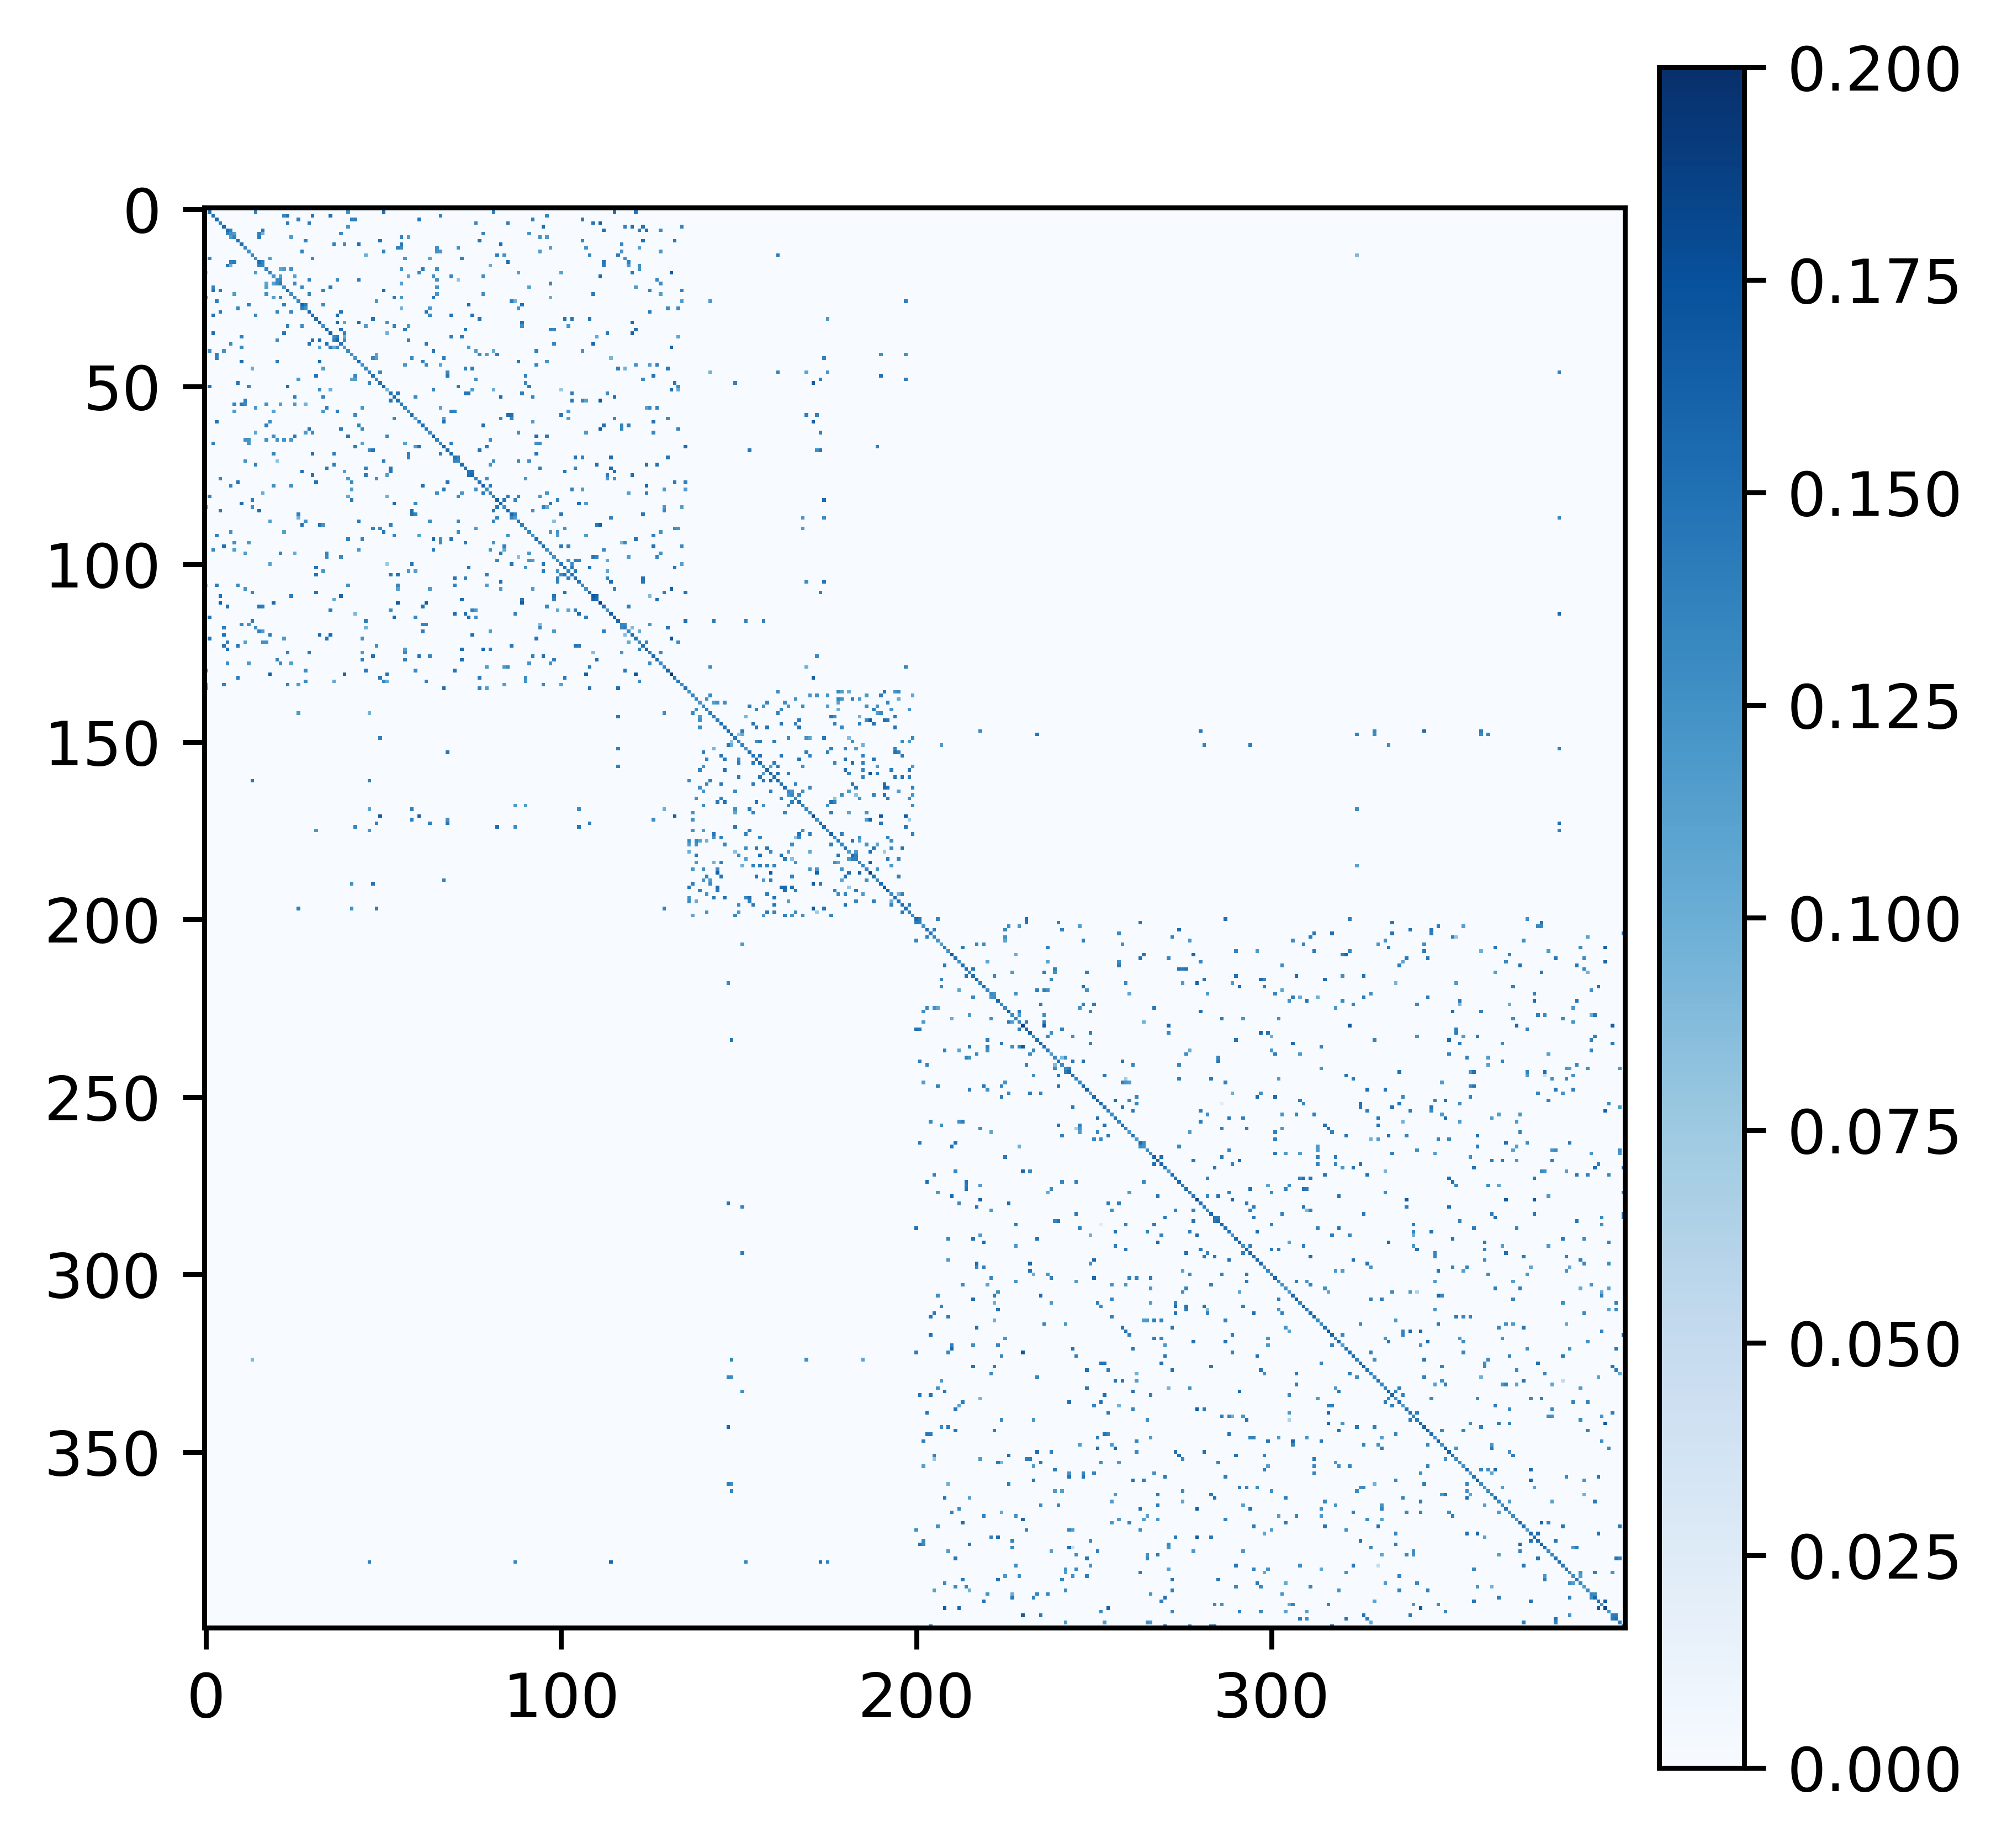

In [14]:
# pred_order = np.argsort(pred_lst[-1])
pred_order = pred_order_save
Pi_sorted = Pi[np.ix_(pred_order, pred_order)]
plot_membership(Pi_sorted)

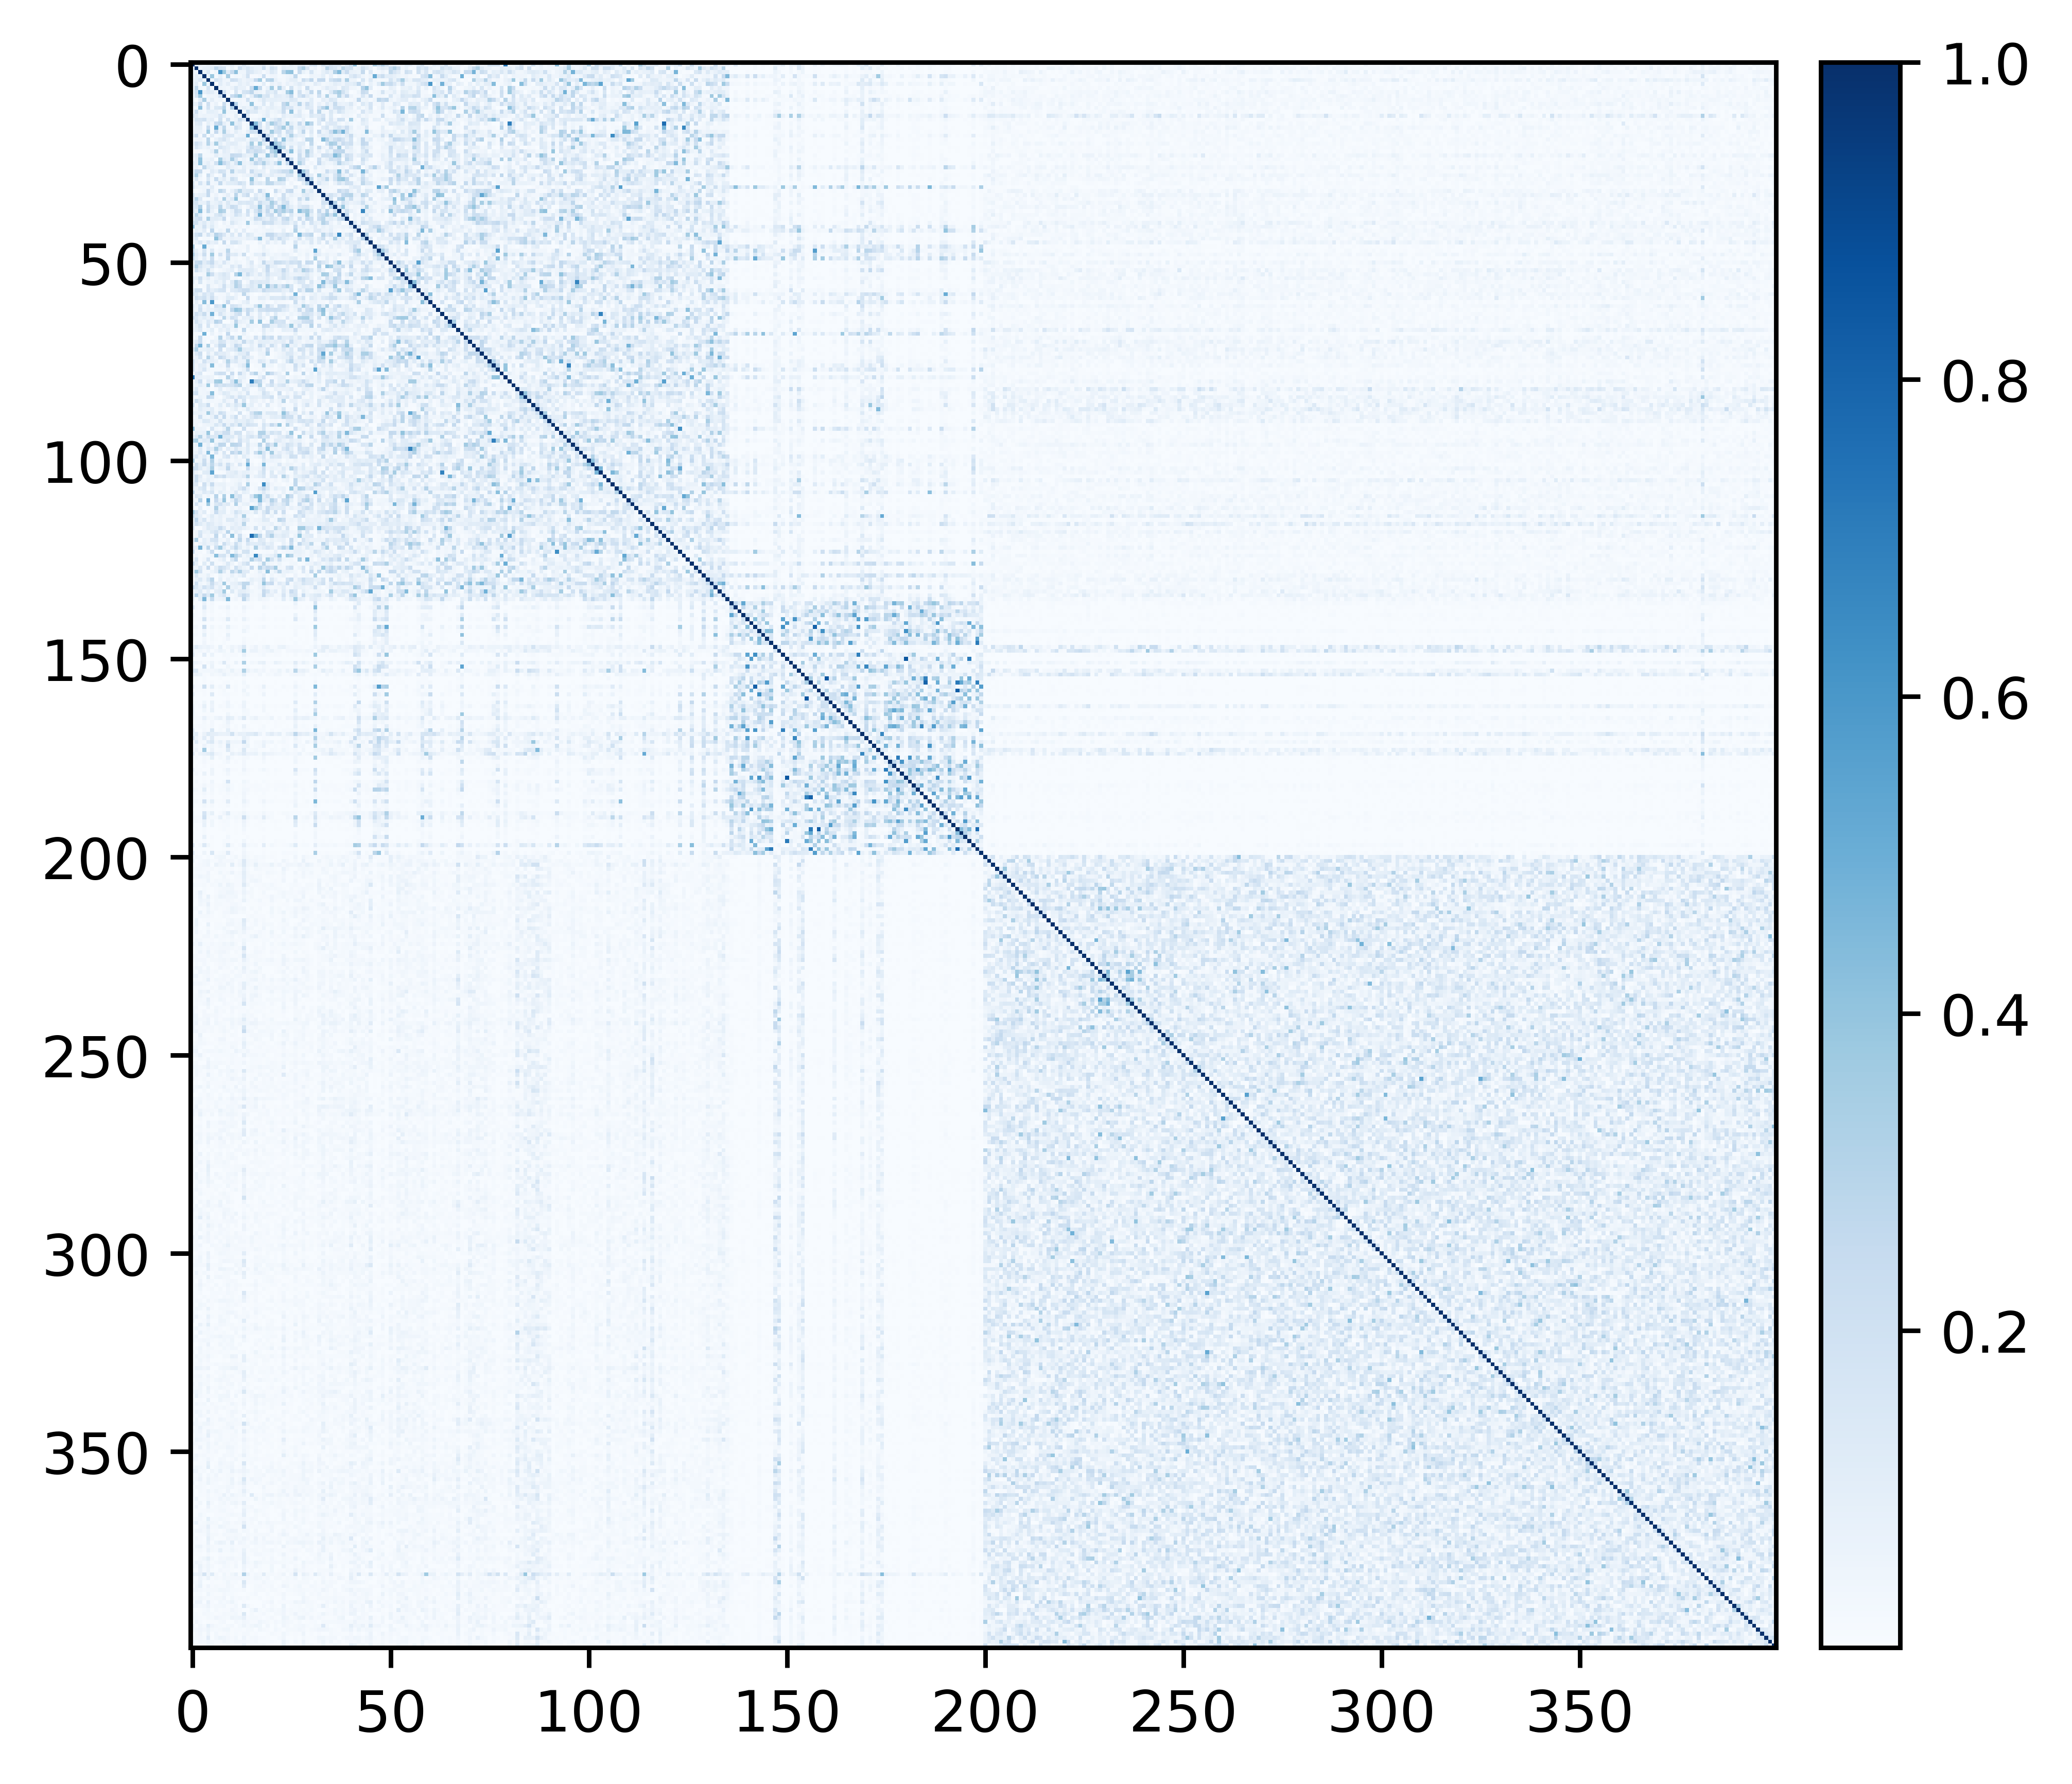

In [16]:
plot_heatmap(Z_train[pred_order])

In [ ]:
pred_lst[-1][pred_order]

In [ ]:
y_train[pred_order]

In [10]:
block_a = np.nonzero(pred_lst[-1] == 1)[0][-20:]
print(block_a)
block_b = np.nonzero(pred_lst[-1] == 0)[0][-20:]
print(block_b)



[346 347 348 349 353 356 360 364 365 368 374 376 377 383 385 388 391 394
 396 397]
[370 371 372 373 375 378 379 380 381 382 384 386 387 389 390 392 393 395
 398 399]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


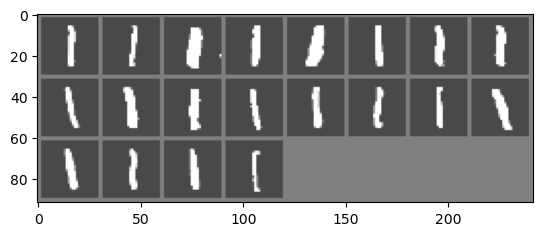

In [11]:
X_train_t = torch.from_numpy(X_train)

gird_images_1 = tv.utils.make_grid(X_train_t[block_a])
matplotlib_imshow(gird_images_1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


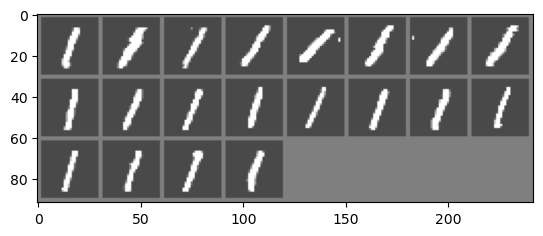

In [12]:
gird_images_2 = tv.utils.make_grid(X_train_t[block_b])
matplotlib_imshow(gird_images_2)